In [77]:
import numpy as np
import xarray as xr 
import matplotlib.tri as tri
import matplotlib.pyplot as plt

# converts quad elements into tri elements
def quads_to_tris(quads):
    tris = [[None for j in range(3)] for i in range(2*len(quads))]
    for i in range(len(quads)):
        j = 2*i
        n0 = quads[i][0]
        n1 = quads[i][1]
        n2 = quads[i][2]
        n3 = quads[i][3]
        tris[j][0] = n0
        tris[j][1] = n1
        tris[j][2] = n2
        tris[j + 1][0] = n2
        tris[j + 1][1] = n3
        tris[j + 1][2] = n0
    return tris

In [78]:
src_fp   = "glc1-a/nc/glc1-a_dx_50_MB_-1.000_OFF_prog_NetcdfOutPutSolve.nc"
with xr.open_dataset(src_fp) as src: 
    src["height"] = xr.where(src.height <= 10, 0, src.height)
    # src["Z"]     = src.zbed + src.Z * src.height 
    src['vel_m'] = np.sqrt(src['velocity 1']**2 + src['velocity 2']**2)

In [79]:
#src.Mesh_node_y.isel(time=[0, 10, 20])

In [80]:
float(src.time[10])

5.099999999999998

In [81]:
# # index for number of triangles in mesh
# src["nMesh_triang"]         = np.arange(src.nMesh_face.size * 2)
# # index for points of triangles
# src["nMaxMesh_triang_nodes"] = np.array([0,1,2])

In [82]:
src

<xarray.Dataset>
Dimensions:                (nMaxMesh_face_nodes: 4, nMesh_face: 2190, nMesh_node: 2352, time: 22)
Coordinates:
  * time                   (time) float64 0.1 0.2 0.3 0.4 ... 5.9 6.0 10.1 10.2
Dimensions without coordinates: nMaxMesh_face_nodes, nMesh_face, nMesh_node
Data variables:
    Mesh                   int32 ...
    Mesh_face_nodes        (nMesh_face, nMaxMesh_face_nodes) float64 ...
    Mesh_node_x            (nMesh_node) float64 ...
    Mesh_node_y            (nMesh_node) float64 ...
    BulkElement_Area       (nMesh_face) float64 ...
    pressure               (time, nMesh_node) float64 ...
    velocity 1             (time, nMesh_node) float64 0.0 0.0 ... -0.02162
    velocity 2             (time, nMesh_node) float64 0.0 0.0 ... -0.01036
    enthalpy_h             (time, nMesh_node) float64 ...
    water content          (time, nMesh_node) float64 ...
    temperature            (time, nMesh_node) float64 ...
    phase change enthalpy  (time, nMesh_node) float64 ...
    surface_enthalpy       (time, nMesh_node) float64 ...
    zs                     (time, nMesh_node) float64 ...
    zbed                   (time, nMesh_node) float64 ...
    mass balance           (time, nMesh_node) float64 ...
    depth                  (time, nMesh_node) float64 ...
    height                 (time, nMesh_node) float64 0.0 0.0 0.0 ... 23.14 0.0
    densi                  (time, nMesh_node) float64 ...
    vel_m                  (time, nMesh_node) float64 0.0 0.0 ... 0.1515 0.02397

In [83]:
len(quads_to_tris(src.Mesh_face_nodes.values - 1))

4380

In [84]:
src.Mesh_node_y

<xarray.DataArray 'Mesh_node_y' (nMesh_node: 2352)>
array([1631.729905, 1632.419586, 1631.20385 , ..., 2881.021341, 2904.015758,
       2939.985293])
Dimensions without coordinates: nMesh_node

0.1
5.099999999999998
10.09999999999998


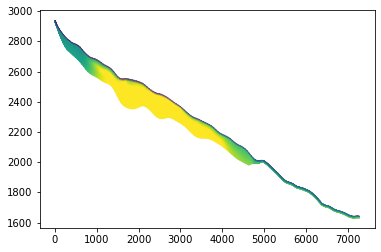

In [86]:
triangles = quads_to_tris(src.Mesh_face_nodes.values - 1)

for time in src.isel(time=[0, 10, 20]).time.values: 
    print(time)
    
    # plot the contours
    plt.tripcolor(src.Mesh_node_x[::-1], 
                  src.Mesh_node_y,#.sel(time=time), 
                  triangles, 
                  src['temperature'].sel(time=time), 
                  shading='gouraud', 
                  alpha=0.5)

plt.savefig('test.pdf')

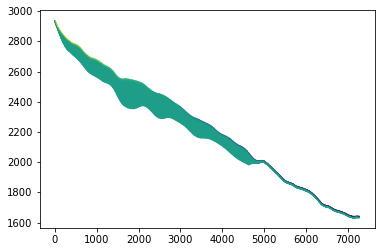

In [87]:
test = quads_to_tris(src.Mesh_face_nodes.values - 1)

# create an unstructured triangular grid instance
triangulation = tri.Triangulation(src.Mesh_node_x[::-1], src.Mesh_node_y, test)

# plot the contours
plt.tripcolor(triangulation, src['mass balance'].isel(time=-5), shading='gouraud')

plt.savefig('test.pdf')